In [2]:
! pip install conda

In [3]:
! pip install mlxtend

In [6]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

#### Using Books dataset

In [7]:
books = pd.read_csv("G:/data sceince/Assignments/Association Rules/book.csv")

In [8]:
books.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [14]:
books.shape                                  # 2000 rows and 11 columns are there

(2000, 11)

#### Apriori algorithm

*To get the frequent item sets applying apriori algorithm

In [ ]:
# creating freq_item sets with 0.1 support value

In [46]:
freq_itemsets = apriori(books, min_support = 0.1, use_colnames = True)
freq_itemsets

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


In [ ]:
# Building the association rules with 70 % confidence

In [54]:
rule1 = association_rules(freq_itemsets, metric="confidence", min_threshold=0.7)
rule1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548
1,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
2,(RefBks),(CookBks),0.2145,0.431,0.1525,0.710956,1.649549,0.060050,1.968556
3,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
4,"(YouthBks, ChildBks)",(CookBks),0.1650,0.431,0.1290,0.781818,1.813963,0.057885,2.607917
5,"(CookBks, YouthBks)",(ChildBks),0.1620,0.423,0.1290,0.796296,1.882497,0.060474,2.832545
6,"(CookBks, DoItYBks)",(ChildBks),0.1875,0.423,0.1460,0.778667,1.840820,0.066687,2.606928
7,"(ChildBks, DoItYBks)",(CookBks),0.1840,0.431,0.1460,0.793478,1.841017,0.066696,2.755158
8,"(CookBks, RefBks)",(ChildBks),0.1525,0.423,0.1225,0.803279,1.899004,0.057993,2.933083
9,"(RefBks, ChildBks)",(CookBks),0.1515,0.431,0.1225,0.808581,1.876058,0.057204,2.972534


In [23]:
# Building the association rules for lift ratio

In [58]:
rules = association_rules(freq_itemsets, metric = 'lift', min_threshold = 0.70)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
95,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
96,"(ArtBks, GeogBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
97,(CookBks),"(ArtBks, GeogBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237
98,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327


Inference: After considering support value = 0.1 we have got 100 rules created. 
leverage: leverage value of 0 indicates independance between the antecedent and consequent. There should be dependence between the antecedent and the consequent

conviction: High conviction means consequent is highly dependant on antecedent


In [59]:
# Viewing first 20 rules

In [60]:
rules.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
28,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
29,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
77,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
80,(GeogBks),"(ChildBks, ArtBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
86,(ArtBks),"(CookBks, DoItYBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
83,"(CookBks, DoItYBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797
99,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
94,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
98,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
95,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657


In [62]:
# Extracting the rules where the lift ratio > 1

In [63]:
rules[rules.lift >1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
95,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
96,"(ArtBks, GeogBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
97,(CookBks),"(ArtBks, GeogBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237
98,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327


In [64]:
# Plotting the rules

In [ ]:
# Plot between support vs confidence

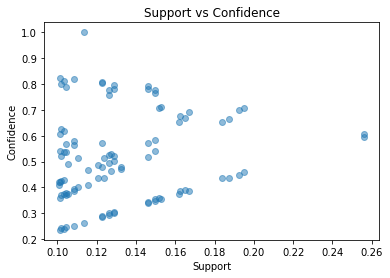

In [115]:
plt.scatter(rules['support'],rules['confidence'], alpha = 0.5)
plt.title("Support vs Confidence")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.show()

In [112]:
# Plot between support vs lift

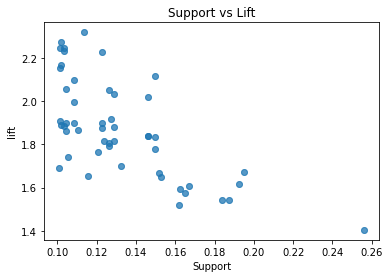

In [116]:
plt.scatter(rules['support'],rules['lift'], alpha = 0.5)
plt.title("Support vs Lift")
plt.xlabel("Support")
plt.ylabel("lift")
plt.show()

In [ ]:
# Plot between lift vs confidence

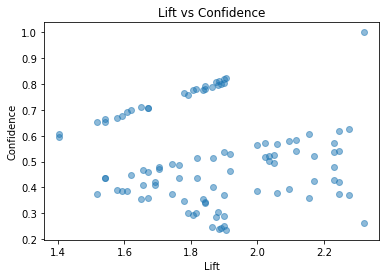

In [118]:
plt.scatter(rules['lift'],rules['confidence'], alpha = 0.5)
plt.title("Lift vs Confidence")
plt.xlabel("Lift")
plt.ylabel("Confidence")
plt.show()

In [66]:
# Creating freq sets with 0.2 support value

In [69]:
freq_sets = apriori(books, min_support = 0.2, use_colnames = True)
freq_sets

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.2560,"(CookBks, ChildBks)"


In [ ]:
# creating rules for 60% confidence 

In [75]:
rules2 = association_rules(freq_sets, metric = 'confidence', min_threshold = 0.6)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.44124


Inference: For 60 % confidence we are getting only 1 rule created

In [76]:
rules_lift = association_rules(freq_sets, metric="lift", min_threshold=0.60)
rules_lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069
1,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240


Inference: If we build the rule on lift metrics and consider lift threshold as 60% we are getting 2 rules created

In [ ]:
# Plotting the rules

In [ ]:
# Plot of Support vs confidence

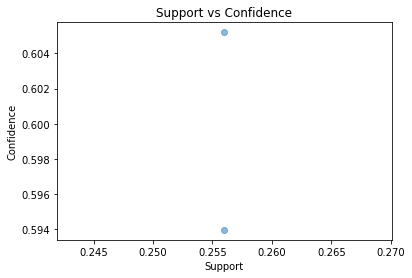

In [121]:
plt.scatter(rules_lift['support'],rules_lift['confidence'], alpha = 0.5)
plt.title("Support vs Confidence")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.show()

In [ ]:
# Plot of support vs lift

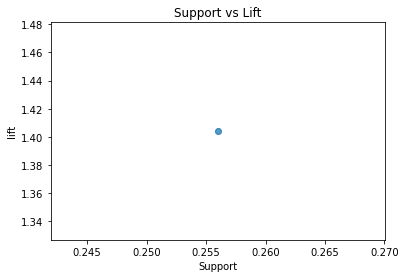

In [122]:
plt.scatter(rules_lift['support'],rules_lift['lift'], alpha = 0.5)
plt.title("Support vs Lift")
plt.xlabel("Support")
plt.ylabel("lift")
plt.show()

In [ ]:
# Plot of lift vs confidence

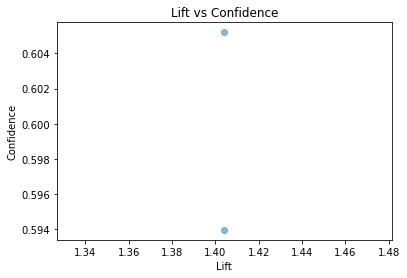

In [123]:
plt.scatter(rules_lift['lift'],rules_lift['confidence'], alpha = 0.5)
plt.title("Lift vs Confidence")
plt.xlabel("Lift")
plt.ylabel("Confidence")
plt.show()

In [82]:
rules2[rules2.confidence > 0.6]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.44124


In [83]:
# Creating sets for different support value 0.001

In [95]:
freq_set1 = apriori(books, min_support = 0.001, use_colnames = True)
freq_set1

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
2042,0.0015,"(GeogBks, Florence, RefBks, ItalArt, YouthBks,..."
2043,0.0010,"(GeogBks, Florence, RefBks, ItalArt, YouthBks,..."
2044,0.0010,"(GeogBks, Florence, RefBks, ItalArt, ChildBks,..."
2045,0.0010,"(GeogBks, Florence, RefBks, ItalArt, YouthBks,..."


In [86]:
# Creating rules for 65% confidence

In [96]:
rules3 = association_rules(freq_set1, metric = 'confidence', min_threshold = 0.65)
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
2,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
3,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427
4,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074
...,...,...,...,...,...,...,...,...,...
17476,"(Florence, YouthBks, ItalAtlas, ItalCook, ArtBks)","(GeogBks, RefBks, ItalArt, ChildBks, DoItYBks,...",0.0015,0.0050,0.0010,0.666667,133.333333,0.000993,2.985000
17477,"(Florence, YouthBks, ItalAtlas, CookBks, ArtBks)","(GeogBks, RefBks, ItalArt, ChildBks, DoItYBks,...",0.0015,0.0050,0.0010,0.666667,133.333333,0.000993,2.985000
17478,"(Florence, DoItYBks, ItalAtlas, ItalCook, ArtBks)","(GeogBks, RefBks, ItalArt, YouthBks, ChildBks,...",0.0010,0.0055,0.0010,1.000000,181.818182,0.000994,inf
17479,"(Florence, DoItYBks, ItalAtlas, CookBks, ArtBks)","(GeogBks, RefBks, ItalArt, YouthBks, ChildBks,...",0.0015,0.0055,0.0010,0.666667,121.212121,0.000992,2.983500


In [106]:
rules_lift1 = association_rules(freq_set1, metric = 'lift', min_threshold = 0.65)
rules_lift1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.165,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.165,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.256,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.256,0.605201,1.404179,0.073687,1.441240
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.184,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
173047,(DoItYBks),"(GeogBks, Florence, RefBks, ItalArt, YouthBks,...",0.2820,0.0015,0.001,0.003546,2.364066,0.000577,1.002053
173048,(ItalAtlas),"(GeogBks, Florence, RefBks, ItalArt, YouthBks,...",0.0370,0.0010,0.001,0.027027,27.027027,0.000963,1.026750
173049,(ItalCook),"(GeogBks, Florence, RefBks, ItalArt, YouthBks,...",0.1135,0.0010,0.001,0.008811,8.810573,0.000887,1.007880
173050,(CookBks),"(GeogBks, Florence, RefBks, ItalArt, YouthBks,...",0.4310,0.0010,0.001,0.002320,2.320186,0.000569,1.001323


Inference : As we are decreasing the support value, more number of rules are created

In [ ]:
# Plotting the rules 

In [ ]:
# Plot of Support vs Confidence

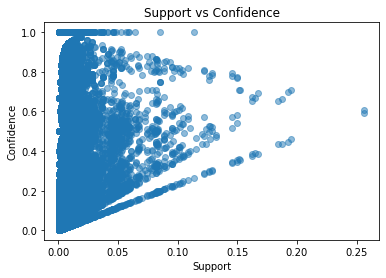

In [124]:
plt.scatter(rules_lift1['support'],rules_lift1['confidence'], alpha = 0.5)
plt.title("Support vs Confidence")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.show()

In [ ]:
# Plot of Support vs Lift

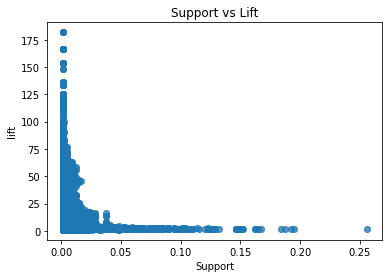

In [125]:
plt.scatter(rules_lift1['support'],rules_lift1['lift'], alpha = 0.5)
plt.title("Support vs Lift")
plt.xlabel("Support")
plt.ylabel("lift")
plt.show()

In [ ]:
# Plot of Lift vs Confidence

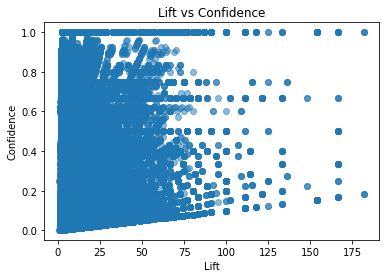

In [126]:
plt.scatter(rules_lift1['lift'],rules_lift1['confidence'], alpha = 0.5)
plt.title("Lift vs Confidence")
plt.xlabel("Lift")
plt.ylabel("Confidence")
plt.show()

In [104]:
rules_lift1.sort_values('lift', ascending = False).head(15)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
170561,"(Florence, DoItYBks, ItalAtlas, ItalCook, ArtBks)","(GeogBks, RefBks, ItalArt, YouthBks, CookBks)",0.0010,0.0055,0.001,1.000000,181.818182,0.000994,inf
172361,"(Florence, DoItYBks, ItalAtlas, ItalCook, ArtBks)","(GeogBks, RefBks, ItalArt, YouthBks, ChildBks,...",0.0010,0.0055,0.001,1.000000,181.818182,0.000994,inf
171940,"(Florence, ChildBks, DoItYBks, ItalAtlas, Ital...","(GeogBks, RefBks, ItalArt, YouthBks, CookBks)",0.0010,0.0055,0.001,1.000000,181.818182,0.000994,inf
171696,"(GeogBks, RefBks, ItalArt, YouthBks, ChildBks,...","(Florence, DoItYBks, ItalAtlas, ItalCook, ArtBks)",0.0055,0.0010,0.001,0.181818,181.818182,0.000994,1.221000
170428,"(GeogBks, RefBks, ItalArt, YouthBks, CookBks)","(Florence, DoItYBks, ItalAtlas, ItalCook, ArtBks)",0.0055,0.0010,0.001,0.181818,181.818182,0.000994,1.221000
172117,"(GeogBks, RefBks, ItalArt, YouthBks, CookBks)","(Florence, ChildBks, DoItYBks, ItalAtlas, Ital...",0.0055,0.0010,0.001,0.181818,181.818182,0.000994,1.221000
168382,"(GeogBks, RefBks, ItalArt, YouthBks, DoItYBks)","(Florence, ChildBks, ItalAtlas, ItalCook, ArtBks)",0.0030,0.0020,0.001,0.333333,166.666667,0.000994,1.497000
172251,"(Florence, RefBks, ItalArt, DoItYBks, ItalCook)","(GeogBks, YouthBks, ChildBks, ItalAtlas, CookB...",0.0015,0.0040,0.001,0.666667,166.666667,0.000994,2.988000
171365,"(GeogBks, RefBks, ItalArt, YouthBks, ChildBks,...","(ArtBks, ItalAtlas, ItalCook, Florence)",0.0030,0.0020,0.001,0.333333,166.666667,0.000994,1.497000
168381,"(GeogBks, RefBks, ItalArt, YouthBks, ChildBks)","(Florence, DoItYBks, ItalAtlas, ItalCook, ArtBks)",0.0060,0.0010,0.001,0.166667,166.666667,0.000994,1.198800


In [105]:
rules_lift1[rules_lift1.lift > 1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.165,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.165,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.256,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.256,0.605201,1.404179,0.073687,1.441240
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.184,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
173047,(DoItYBks),"(GeogBks, Florence, RefBks, ItalArt, YouthBks,...",0.2820,0.0015,0.001,0.003546,2.364066,0.000577,1.002053
173048,(ItalAtlas),"(GeogBks, Florence, RefBks, ItalArt, YouthBks,...",0.0370,0.0010,0.001,0.027027,27.027027,0.000963,1.026750
173049,(ItalCook),"(GeogBks, Florence, RefBks, ItalArt, YouthBks,...",0.1135,0.0010,0.001,0.008811,8.810573,0.000887,1.007880
173050,(CookBks),"(GeogBks, Florence, RefBks, ItalArt, YouthBks,...",0.4310,0.0010,0.001,0.002320,2.320186,0.000569,1.001323
